In [1]:
import numpy as np
import matplotlib.pyplot as plt

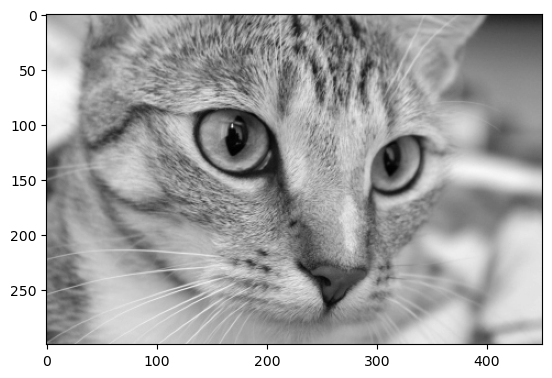

In [2]:
from skimage import data
from skimage.color import rgb2gray

from skimage import img_as_ubyte,img_as_float
cat_image = rgb2gray(img_as_float(data.chelsea()))  
plt.imshow(cat_image, cmap='gray')

In [3]:
from numpy.linalg import svd

In [4]:
original_shape = cat_image.shape
print(original_shape) 

(300, 451)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [17]:
k = 50
reconst_img,s = compress_svd(cat_image,k)

The first 10 singular values: [170.4  21.6  17.4  12.4  11.5  10.2   9.1   7.4   6.9   6.6]


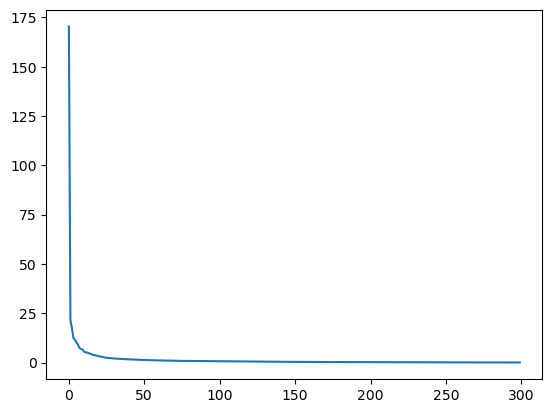

In [18]:
print('The first 10 singular values:', np.round(s[:10],1))
plt.plot(s)

The first 10 singular values: [170.4  21.6  17.4  12.4  11.5  10.2   9.1   7.4   6.9   6.6]
The size of origianl image: 135300
The size after compression: 37600


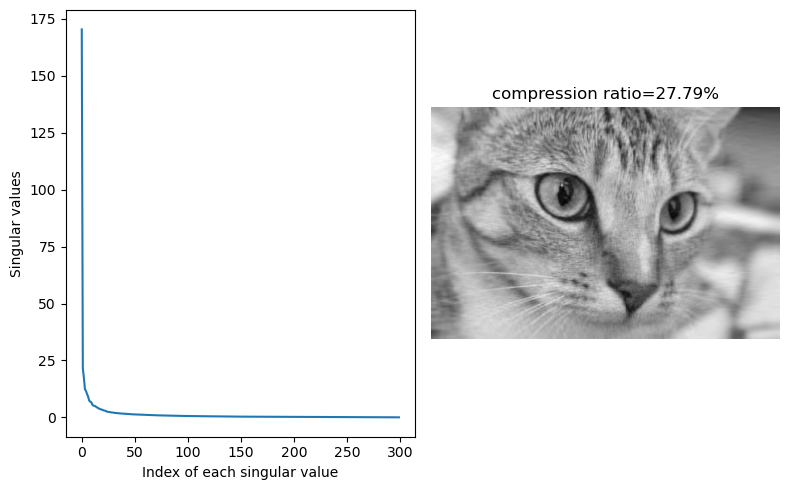

In [19]:
print('The first 10 singular values:', np.round(s[:10],1))
fig,axes = plt.subplots(1,2,figsize=(8,5))

axes[0].plot(s)
axes[0].set_xlabel('Index of each singular value')
axes[0].set_ylabel('Singular values')
print('The size of origianl image:', original_shape[0]*original_shape[1])
print('The size after compression:',k*(original_shape[0] + original_shape[1]+1))
compression_ratio =k*(original_shape[0] + original_shape[1]+1)/(original_shape[0]*original_shape[1])*100
axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
axes[1].imshow(reconst_img,cmap='gray')
axes[1].axis('off')
fig.tight_layout()


#### Task:
##### Having studied the code above, write the code, which will only return images at a compression rate between 50% and 85% of the original cat image. You should also calculate the threshold number of minimum singular values for which SVD for this image does make sense as reduction of the total amount of data used and stored to represent the original image.

C:\Users\richa\AppData\Local\Temp\ipykernel_6812\466773731.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


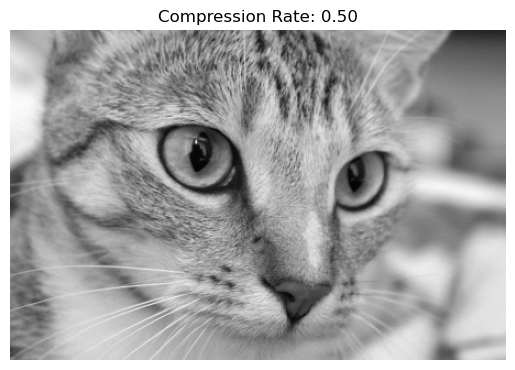

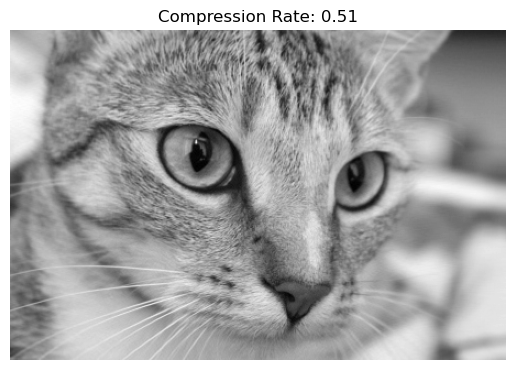

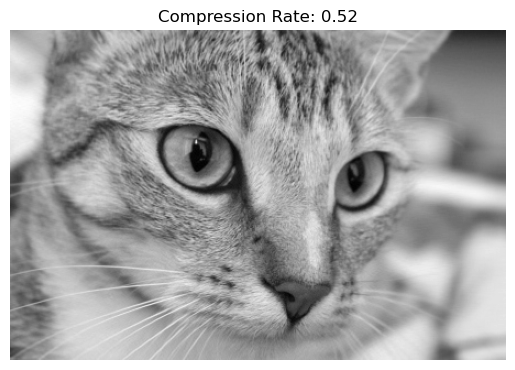

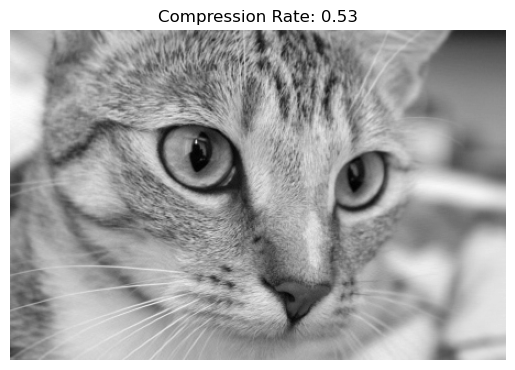

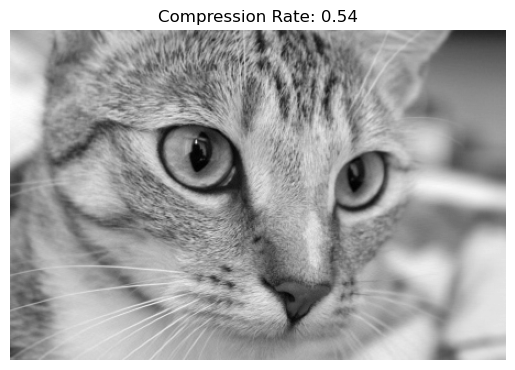

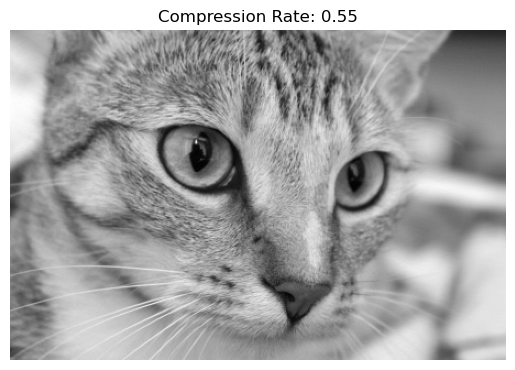

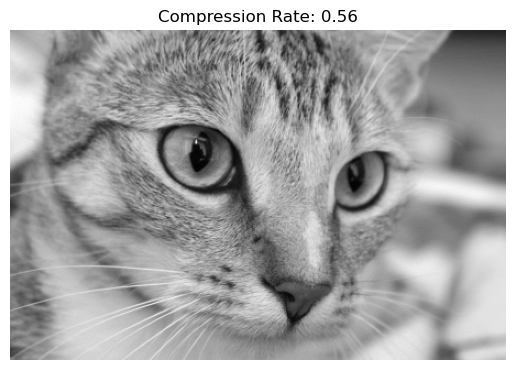

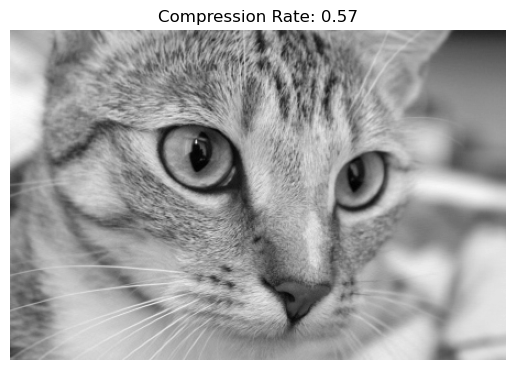

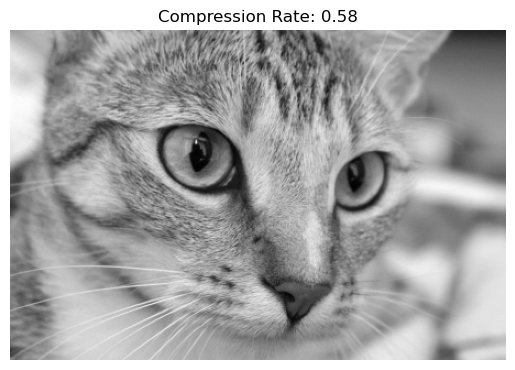

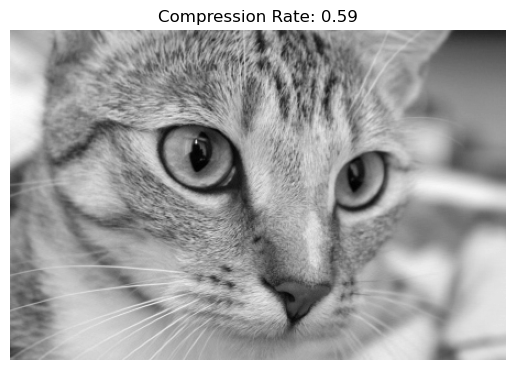

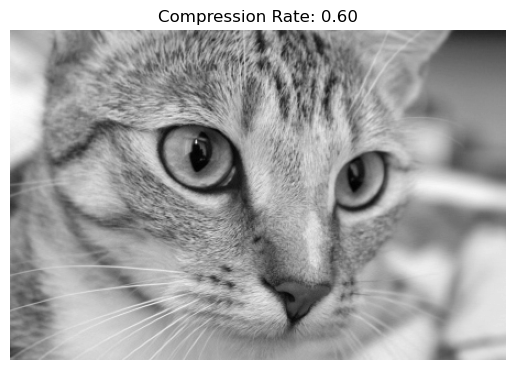

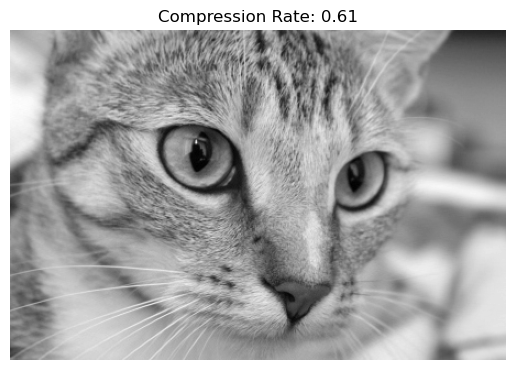

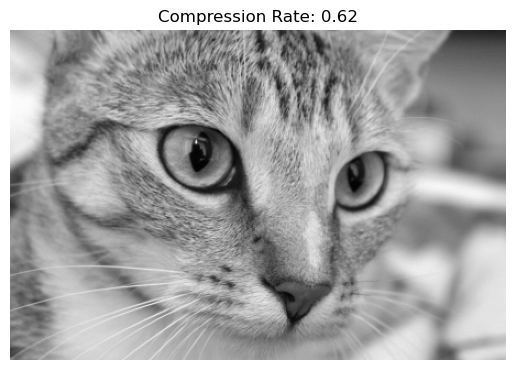

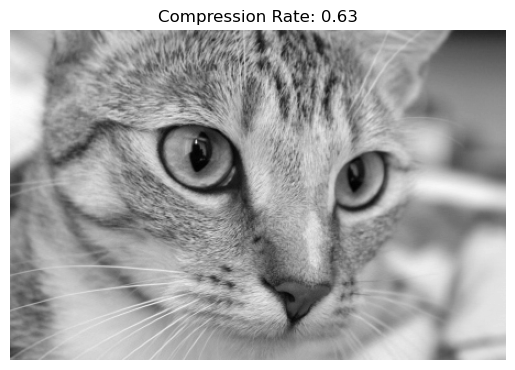

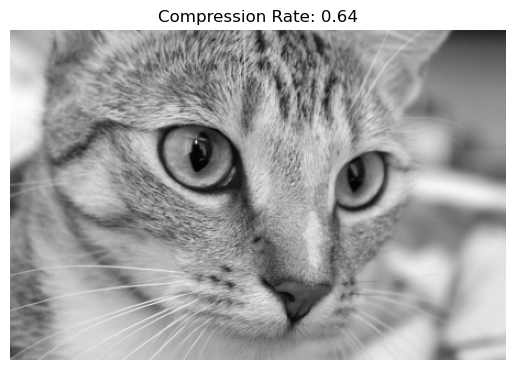

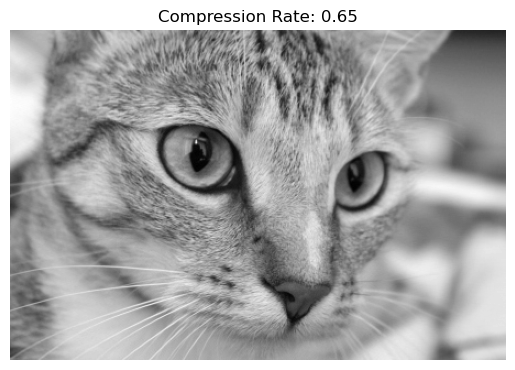

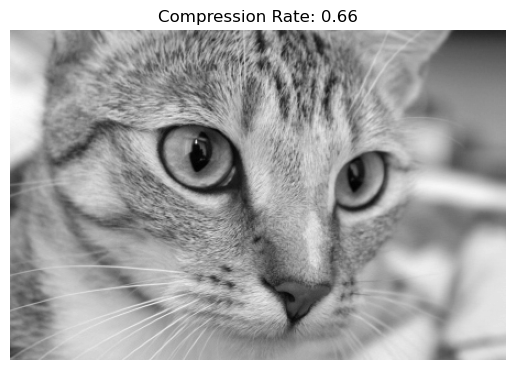

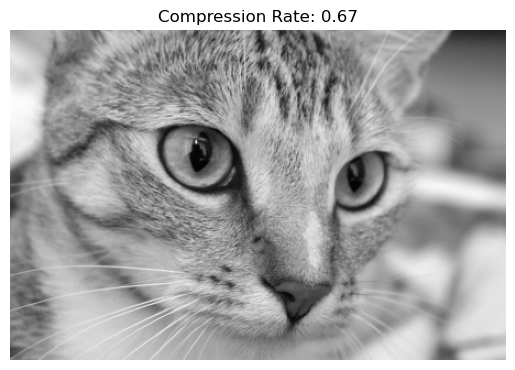

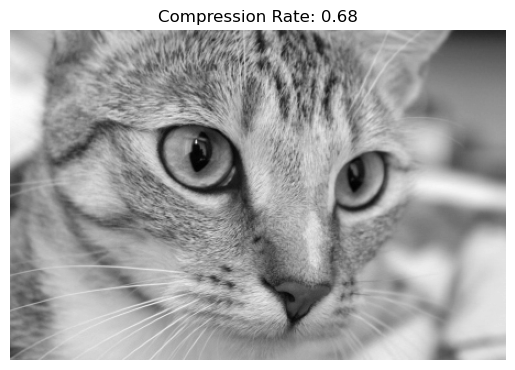

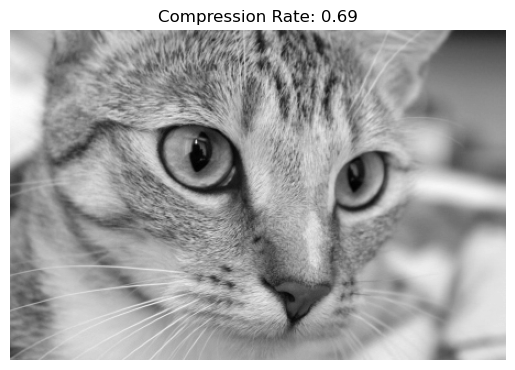

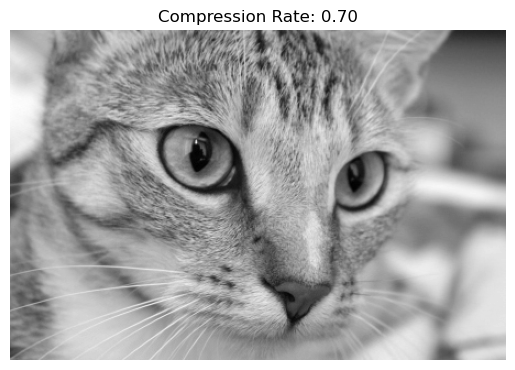

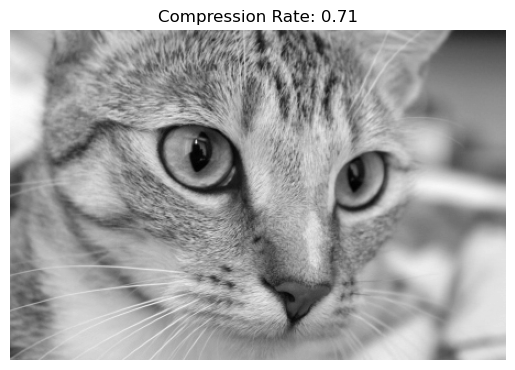

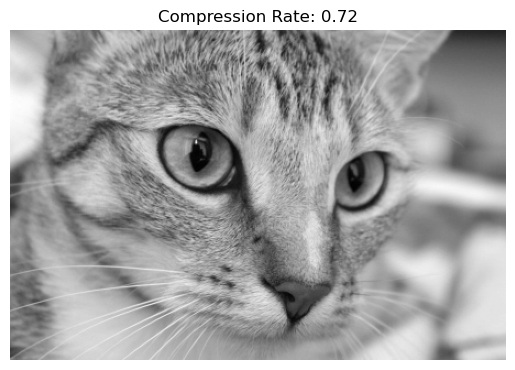

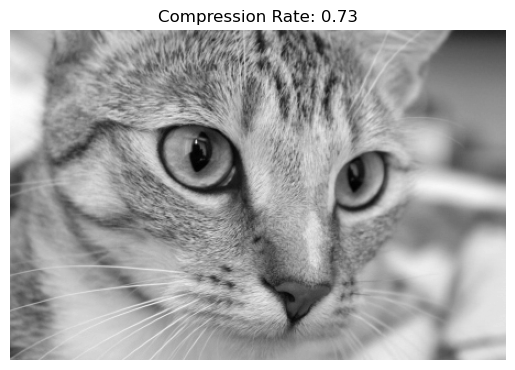

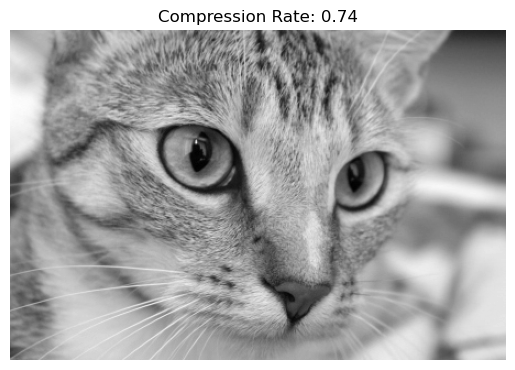

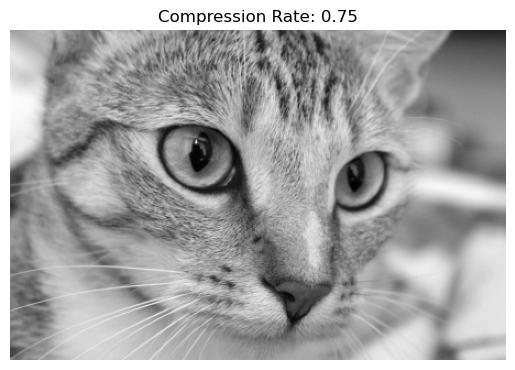

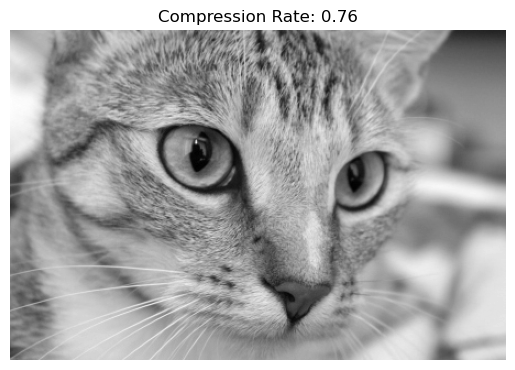

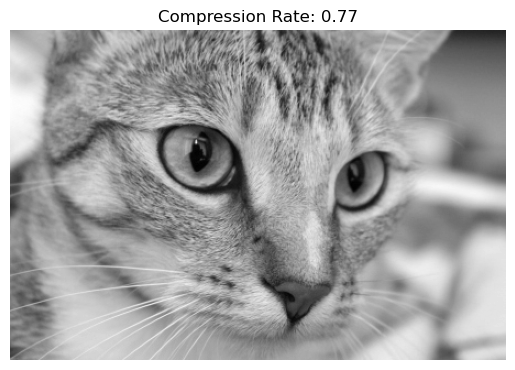

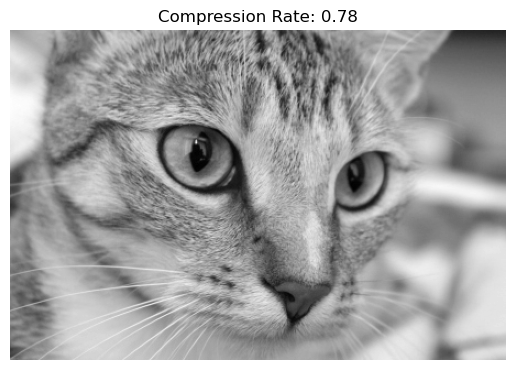

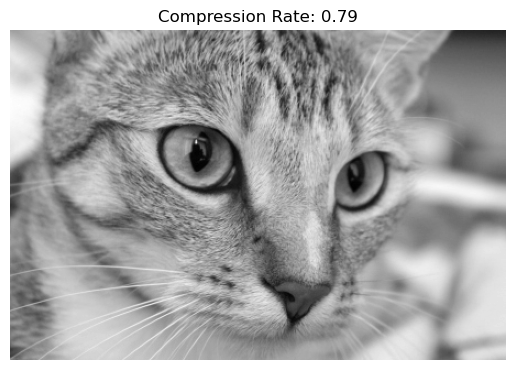

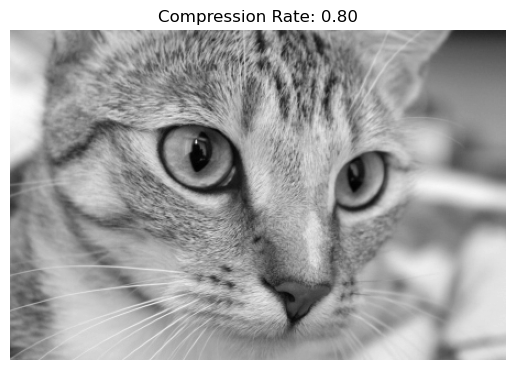

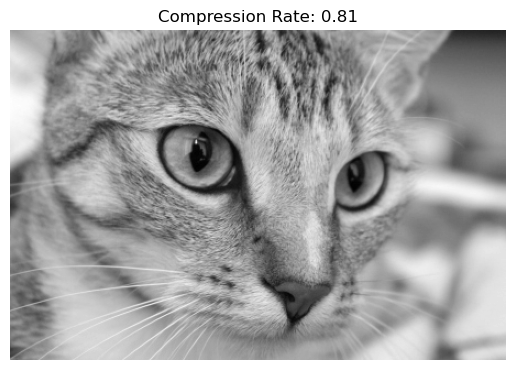

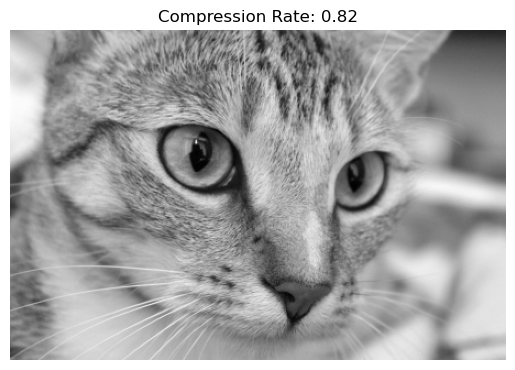

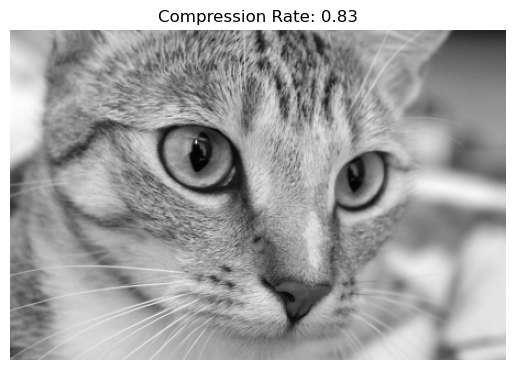

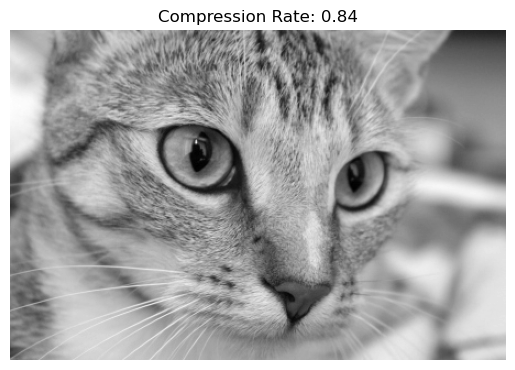

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from skimage.color import rgb2gray

# Load the cat image
cat_image = rgb2gray(data.chelsea())

# Calculate Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(cat_image, full_matrices=False)

# Total number of singular values
total_singular_values = len(S)

# Calculate compression rates and corresponding number of singular values
compression_rates = np.arange(0.5, 0.86, 0.01)
num_singular_values = [int(total_singular_values * rate) for rate in compression_rates]

# Threshold number of minimum singular values
threshold_num_singular_values = int(total_singular_values * 0.01)  # For example, 1% of the total singular values

# Reconstruct images and display for compression rates between 50% and 85%
for rate, num_sv in zip(compression_rates, num_singular_values):
    if num_sv >= threshold_num_singular_values:
        # Reconstruct the image using the reduced number of singular values
        reconstructed_image = np.dot(U[:, :num_sv], np.dot(np.diag(S[:num_sv]), Vt[:num_sv, :]))

        # Display images only for compression rates between 50% and 85%
        if 0.5 <= rate <= 0.85:
            plt.figure()
            plt.imshow(reconstructed_image, cmap='gray')
            plt.title(f'Compression Rate: {rate:.2f}')
            plt.axis('off')

plt.show()
